### Section 1: Business understanding
I'd like to understand more about the YouTube algorithm and what makes a video trend globally. With YouTube’s ever-growing popularity, and the ability to produce a stable income out of uploading YouTube videos, understanding how the algorithm works becomes more and more important.

To do so, I divided my analysis into 3 questions that i'll be attempting to evaluate and understand.
 1. What is the best time to upload a video on YouTube? 
 2. Which video categories are more likely to trend?
 3. How many trending videos in the United states trend in other regions? 

In [1]:
#Initializations and reading in dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



### Section 2: Data understanding    

##### Gather Data
I'll start by loading in the datsets

In [2]:
usdf = pd.read_csv('C:/Datascience/US_youtube_trending_data.csv')
jpndf = pd.read_csv('C:/Datascience/JP_youtube_trending_data.csv')
dedf = pd.read_csv('C:/Datascience/DE_youtube_trending_data.csv')
ukdf = pd.read_csv('C:/Datascience/GB_youtube_trending_data.csv')

##### Assessing the data

In [3]:
usdf.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


Looking at the dataset in hand, I see a few columns that are of interest to me. The video_id is the unique identifier for each video, publishedAt displays the exact timing of when a video was published, the categoryId is seen to be different between each video, and then we can see some statistics on how well each video is doing in terms of reach. 

In [4]:
#Checking number of rows
usdf.shape[0]

171990

In [5]:
#Checking for duplicates
(usdf['video_id']=='M9Pmf9AB4Mo').sum()

5

In [6]:
#Checking null values for columns in consideration; expected to be 0 since the data gathered is automated from YouTube
print((usdf['publishedAt'].isnull()).sum(),(usdf['categoryId'].isnull()).sum(),(usdf['video_id'].isnull()).sum())

0 0 0


Apparently, the unique identifier is sometimes repeated a few times, this could be due to a specific video trending more than once. This could bias our analysis so we have to remove the duplicates to have somewhat cleaner data to work with. We don't have to worry about null values since the data gathered is automated and after assessing, we have no null values to deal with.

### Section 3: Data preparation

##### Cleaning the data

In [7]:
#Removing duplicate videos (As videos can trend more than once)
usdf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
dedf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
ukdf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
jpndf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)

In [8]:
#Checking new number of rows after dropping duplicates
usdf.shape[0]

31710

### Section 4: Evaluation

In order to ease the visualization process I will create two functions that produce bar and pie charts

In [9]:
def barplot(data, xlabel, ylabel, title, width):
    '''
    This function plots the given data into a bar plot with correct X labels, Y labels, and title

    Input: 
        data: data needed to be ploted
         xlabel: x axis label (String)
         ylabel: y axis label (String)
         title: title for the bar chart
         width: width of the bars on the plot
    Output: bar plot for the requested data
    '''

    barplot = data.plot.bar(ylabel = ylabel, xlabel = xlabel, title = title, width = width)
    plt.grid(axis='y', alpha=0.4)
    ax = plt.gca()
    ax.tick_params(axis='x', labelrotation = 82)

In [10]:
def pieplot(data, legend, title, legend_title):
    '''
    This function plots the given data into a bar plot with correct X labels, Y labels, and title

    Input: 
         data: data needed to be ploted
         legend: list of legend names (list of strings)
         title: title for the pie chart
         legend_title: title for the legend 
    Output: bar plot for the requested data
    '''

    pieplot = data.plot.pie(labels=None, autopct='%1.1f%%')
    plt.title(title)
    plt.legend(legend, title = legend_title, loc='upper left');

### **Question 1: What is the best time to upload a video on YouTube?**

In order to answer our first question, i will have to work with the publishedAt column. To do so, I first have to extract the hour from each row since it's better to look at what hour of the day the video was published and exclude the minutes and seconds. Then check the percentage of each hour from the total hours published. 

##### Analyze and visualize 


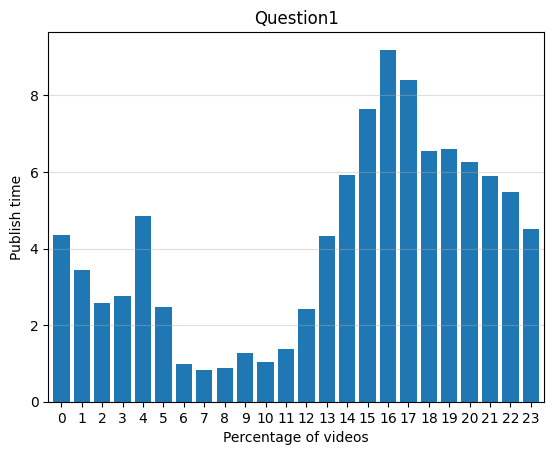

In [11]:
#Analyzing the publish hour 

#Changing type to datetime
timetest=pd.to_datetime(usdf['publishedAt'])

#Extracting hour from datetime
hours= timetest.dt.hour.sort_values().value_counts().sort_index().head(24)

#Plotting percentage of videos published at each hour
data= ((hours/hours.sum())*100)
barplot(data,'Percentage of videos','Publish time', 'Question1', 0.8)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)

##### Results:

The publish time column gave us an in depth analysis on the percentage of trending videos posted at each hour of the day.
The bar chart shows that most trending videos are uploaded between 15:00 to 19:00 with 16:00 being the time when most trending videos are published. 

### **Question 2: Which video categories are more likely to trend?**

Next I want to evaluate my second question and prepare the categoryId column to extract which are the most popular video categories. I do so by firstly replacing Ids with corresponding strings to visualize my data better. Then look for the top categories.

#### Analyze and visualize

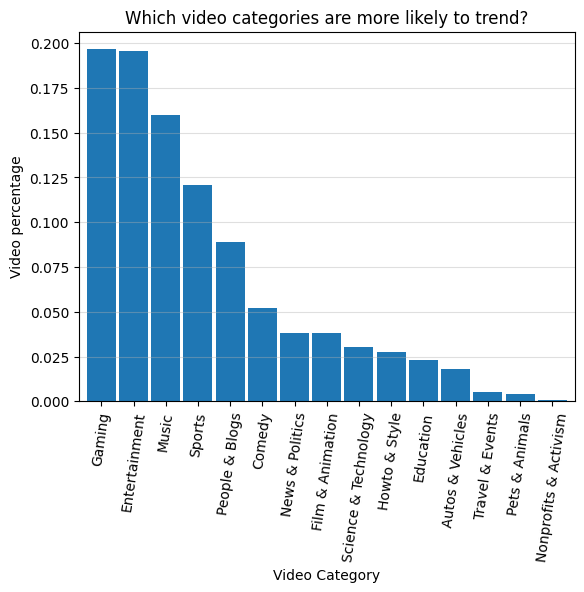

In [12]:
#Analyzing which categories are the most popular among trending videos

#Replacing category Ids with actual names for better representation
usdf['categoryId'].replace(1, 'Film & Animation', inplace=True)
usdf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
usdf['categoryId'].replace(10, 'Music', inplace=True)
usdf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
usdf['categoryId'].replace(17, 'Sports', inplace=True)
usdf['categoryId'].replace(19, 'Travel & Events', inplace=True)
usdf['categoryId'].replace(20, 'Gaming', inplace=True)
usdf['categoryId'].replace(22, 'People & Blogs', inplace=True)
usdf['categoryId'].replace(23, 'Comedy', inplace=True)
usdf['categoryId'].replace(24, 'Entertainment', inplace=True)
usdf['categoryId'].replace(25, 'News & Politics', inplace=True)
usdf['categoryId'].replace(26, 'Howto & Style', inplace=True)
usdf['categoryId'].replace(27, 'Education', inplace=True)
usdf['categoryId'].replace(28, 'Science & Technology', inplace=True)
usdf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)

#Calculating percentage of each category and ploting
data = (usdf['categoryId'].value_counts()/usdf.shape[0]) 
#Calling barplot function
barplot(data, 'Video Category', 'Video percentage', 'Which video categories are more likely to trend?', 0.9)


The analysis according to the bar chart shows that in the region of the United States, Gaming and Entertainment are the top trending video categories with each just under 20% of all trending videos, and music right after them with just over 15%.
I want to isolate the top 4 categories and plot a pie chart.

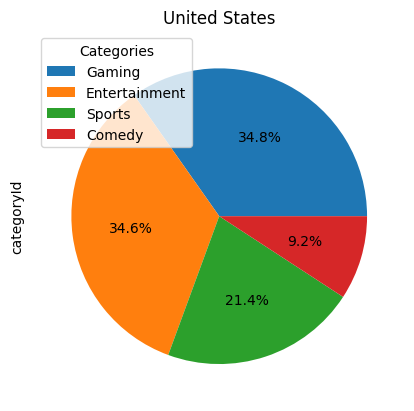

In [13]:
#Plotting the top 4 most popular categories relative to eachother for the US
new_df= usdf.loc[usdf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_df['categoryId'].value_counts()
#Plotting pie chart and adding legend
data = ((vals/usdf.shape[0])*100)
pieplot(data, ['Gaming','Entertainment','Sports','Comedy'], "United States", 'Categories')

I'll repeat the data preparation process done in the US region for 3 more regions and compare my results

The DE(Germany) region:

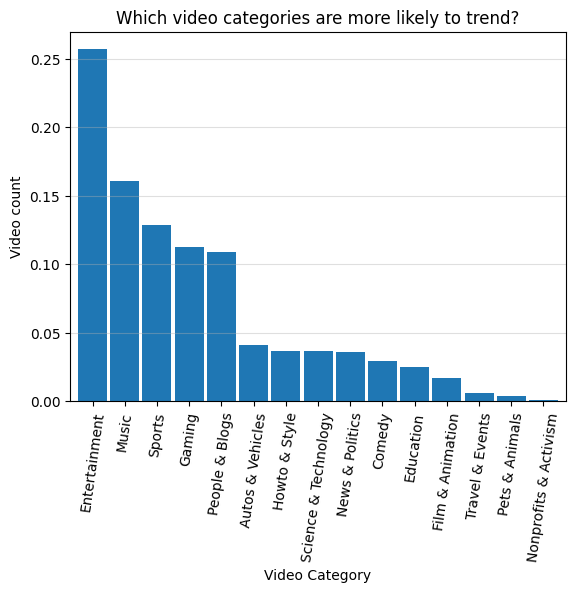

In [14]:
#Doing the exact same methods for UK, Germany, Japan regions

#There's definitly a more pythonic way of replacing the Ids but incase the json file is not available
dedf['categoryId'].replace(1, 'Film & Animation', inplace=True)
dedf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
dedf['categoryId'].replace(10, 'Music', inplace=True)
dedf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
dedf['categoryId'].replace(17, 'Sports', inplace=True)
dedf['categoryId'].replace(19, 'Travel & Events', inplace=True)
dedf['categoryId'].replace(20, 'Gaming', inplace=True)
dedf['categoryId'].replace(22, 'People & Blogs', inplace=True)
dedf['categoryId'].replace(23, 'Comedy', inplace=True)
dedf['categoryId'].replace(24, 'Entertainment', inplace=True)
dedf['categoryId'].replace(25, 'News & Politics', inplace=True)
dedf['categoryId'].replace(26, 'Howto & Style', inplace=True)
dedf['categoryId'].replace(27, 'Education', inplace=True)
dedf['categoryId'].replace(28, 'Science & Technology', inplace=True)
dedf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)
dedf['categoryId'].replace(30, 'Movies', inplace=True)

data = (dedf['categoryId'].value_counts()/dedf.shape[0])

barplot(data, 'Video Category', 'Video count', 'Which video categories are more likely to trend?', 0.9)


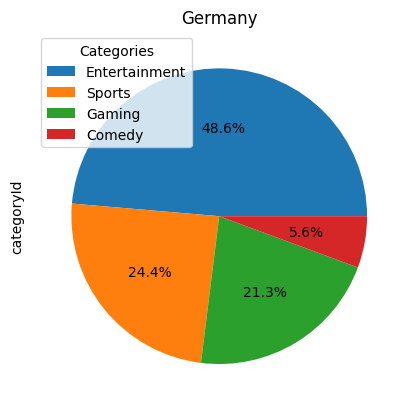

In [15]:
#Plotting a pie chart as done with United states' category values for comparison (for the region of Germany)
new_dedf= dedf.loc[dedf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_dedf['categoryId'].value_counts()
#Plotting pie chart and adding legend
data = ((vals/dedf.shape[0])*100)
pieplot(data, ['Entertainment','Sports', 'Gaming','Comedy'], "Germany", 'Categories')

Germany shares the same top 4 categories as the US but is more popular in the Entertainment Category.

The UK(United Kingdom) region:

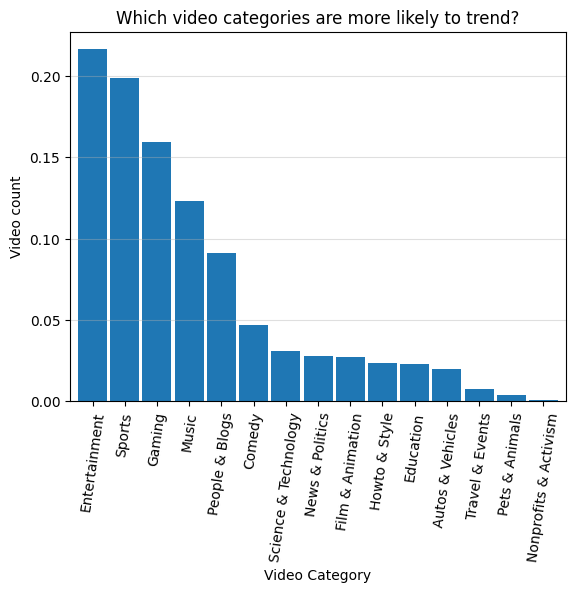

In [16]:
#Unitedkingdom
ukdf['categoryId'].replace(1, 'Film & Animation', inplace=True)
ukdf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
ukdf['categoryId'].replace(10, 'Music', inplace=True)
ukdf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
ukdf['categoryId'].replace(17, 'Sports', inplace=True)
ukdf['categoryId'].replace(19, 'Travel & Events', inplace=True)
ukdf['categoryId'].replace(20, 'Gaming', inplace=True)
ukdf['categoryId'].replace(22, 'People & Blogs', inplace=True)
ukdf['categoryId'].replace(23, 'Comedy', inplace=True)
ukdf['categoryId'].replace(24, 'Entertainment', inplace=True)
ukdf['categoryId'].replace(25, 'News & Politics', inplace=True)
ukdf['categoryId'].replace(26, 'Howto & Style', inplace=True)
ukdf['categoryId'].replace(27, 'Education', inplace=True)
ukdf['categoryId'].replace(28, 'Science & Technology', inplace=True)
ukdf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)
ukdf['categoryId'].replace(30, 'Movies', inplace=True)

data= (ukdf['categoryId'].value_counts()/ukdf.shape[0])

barplot(data, 'Video Category', 'Video count', 'Which video categories are more likely to trend?', 0.9)

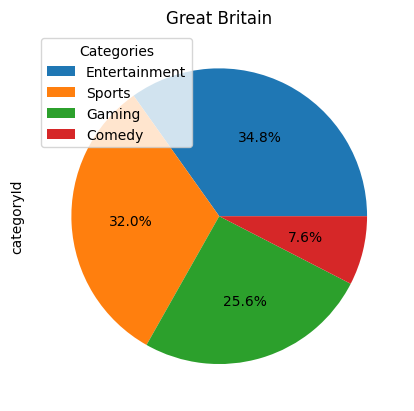

In [17]:
#Plotting a pie chart as done with United states' category values for comparison (for the region of United kingdom)
new_ukdf= ukdf.loc[ukdf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_ukdf['categoryId'].value_counts()
#Plotting pie chart and adding legend
data= ((vals/ukdf.shape[0])*100)
pieplot(data, ['Entertainment','Sports', 'Gaming','Comedy'], "Great Britain", 'Categories')

The Uk is very similar to Germany showing very close results.

The JPN(Japan) region:

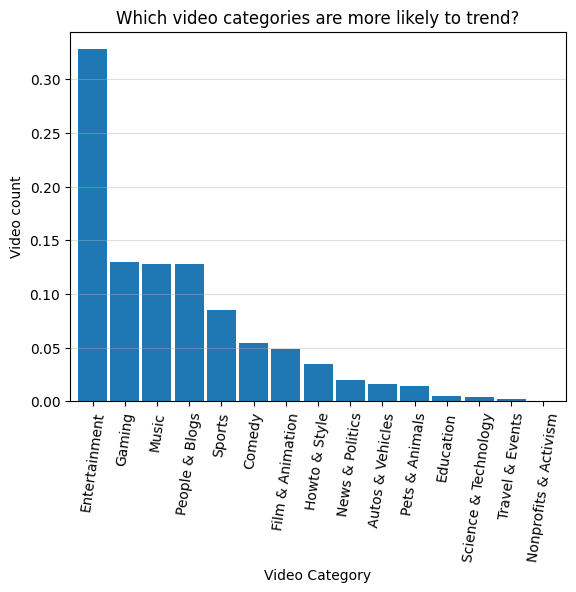

In [18]:
#Japan
jpndf['categoryId'].replace(1, 'Film & Animation', inplace=True)
jpndf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
jpndf['categoryId'].replace(10, 'Music', inplace=True)
jpndf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
jpndf['categoryId'].replace(17, 'Sports', inplace=True)
jpndf['categoryId'].replace(19, 'Travel & Events', inplace=True)
jpndf['categoryId'].replace(20, 'Gaming', inplace=True)
jpndf['categoryId'].replace(22, 'People & Blogs', inplace=True)
jpndf['categoryId'].replace(23, 'Comedy', inplace=True)
jpndf['categoryId'].replace(24, 'Entertainment', inplace=True)
jpndf['categoryId'].replace(25, 'News & Politics', inplace=True)
jpndf['categoryId'].replace(26, 'Howto & Style', inplace=True)
jpndf['categoryId'].replace(27, 'Education', inplace=True)
jpndf['categoryId'].replace(28, 'Science & Technology', inplace=True)
jpndf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)
jpndf['categoryId'].replace(30, 'Movies', inplace=True)

data = (jpndf['categoryId'].value_counts()/jpndf.shape[0])

barplot(data, 'Video Category', 'Video count', 'Which video categories are more likely to trend?', 0.9)

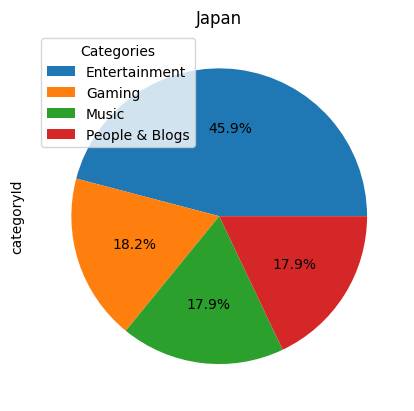

In [19]:
#Plotting a pie chart as done with United states' category values for comparison (for the region of Japan)
new_jpndf= jpndf.loc[jpndf['categoryId'].isin(['Music','People & Blogs','Gaming','Entertainment'])]
vals= new_jpndf['categoryId'].value_counts()
#Plotting pie chart and adding legend
data= ((vals/jpndf.shape[0])*100)
pieplot(data, ['Entertainment','Gaming', 'Music','People & Blogs'], "Japan", 'Categories')

Now Japan has 3/4 of the most common categories in the other regions but is unique in its "People & Blogs" category.

##### Results:
The analysis gave us an indepth review as to what are the top categories across several regions, with 'Entertainment','Sports', 'Gaming', and 'Comedy' being the most common categories for trending videos across all regions with the exception of Japan replacing 'Sports for 'People & Blogs'. 

### **Question 3: How many trending videos in the United states trend in other regions?**

Finally i want to evaluate how many trending videos in the US trend in other regions of the world too. 

In [20]:
#Comparing trending videos in the US to the 3 other regions
test=pd.DataFrame()
#Looking for each US video id in other regions' 'video_id' columns and adding into new test datafram
test['existsuk']=usdf['video_id'].isin(ukdf['video_id'])
test['existsde']=usdf['video_id'].isin(dedf['video_id'])
test['existsjpn']=usdf['video_id'].isin(jpndf['video_id'])

#Calculating percentage found of each video and adding to new series
uk_perc=((test['existsuk']==True).sum())/ukdf['video_id'].shape[0]
de_perc=((test['existsde']==True).sum())/dedf['video_id'].shape[0]
jpn_perc=((test['existsjpn']==True).sum())/jpndf['video_id'].shape[0]
x={'United kingdom':uk_perc, 'Germany':de_perc, 'Japan': jpn_perc}
y=pd.Series(x)
y


United kingdom    0.514326
Germany           0.217221
Japan             0.030170
dtype: float64

#### Results:
The series shows that more than 50% of all videos that trend in the US also trend in the UK onsidering the common language between both countries this does make sense. Around 20% trend in Germany which is a fair amount considering the difference in langauge. Finally only 3% trend in Japan which at a much different region than the US